# Breast Cancer Classification Using Machine Learning

In [56]:
# notebook imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score

In [17]:
# get data
data = pd.read_csv('breast_cancer_data.csv')
data.drop('Unnamed: 32', axis=1, inplace=True)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Data exploration and Viz.

In [18]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [19]:
data.shape

(569, 32)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [22]:
data.all(), data.any()

(id                          True
 diagnosis                   True
 radius_mean                 True
 texture_mean                True
 perimeter_mean              True
 area_mean                   True
 smoothness_mean             True
 compactness_mean            True
 concavity_mean             False
 concave points_mean        False
 symmetry_mean               True
 fractal_dimension_mean      True
 radius_se                   True
 texture_se                  True
 perimeter_se                True
 area_se                     True
 smoothness_se               True
 compactness_se              True
 concavity_se               False
 concave points_se          False
 symmetry_se                 True
 fractal_dimension_se        True
 radius_worst                True
 texture_worst               True
 perimeter_worst             True
 area_worst                  True
 smoothness_worst            True
 compactness_worst           True
 concavity_worst            False
 concave point

In [23]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Text(0.5, 1.0, 'Class Distributions \n M     B')

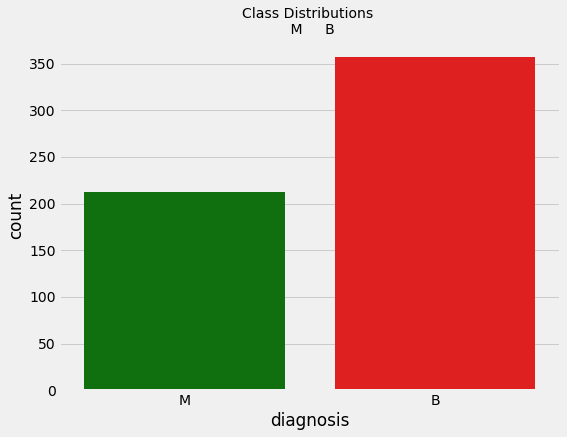

In [25]:
colors = ["green", "red"]

plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=data, palette=colors)
plt.title('Class Distributions \n M     B', fontsize=14, color='k')

## data preprocessing

In [46]:
#Encoding categorical data values

from sklearn.preprocessing import LabelEncoder

X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [47]:
y_encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [48]:
# splitting the data for training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=.2, random_state=42)

In [49]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

## Build Model and Evaluate

In [55]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
# evaluate KNN
knn_preds = knn_clf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, knn_preds)}')
print(f'Recall: {recall_score(y_test, knn_preds)}')
print(f'Precision: {precision_score(y_test, knn_preds)}')
print(f'F1_score: {f1_score(y_test, knn_preds)}')

Accuracy: 0.9473684210526315
Recall: 0.9302325581395349
Precision: 0.9302325581395349
F1_score: 0.9302325581395349


In [58]:
# SVM

from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [59]:
# evaluate SVM
svm_preds = svm_clf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, svm_preds)}')
print(f'Recall: {recall_score(y_test, svm_preds)}')
print(f'Precision: {precision_score(y_test, svm_preds)}')
print(f'F1_score: {f1_score(y_test, svm_preds)}')

Accuracy: 0.9824561403508771
Recall: 0.9534883720930233
Precision: 1.0
F1_score: 0.9761904761904763


In [61]:
# Decision tree

from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [62]:
# evaluate Decision tree

tree_preds = tree_clf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, tree_preds)}')
print(f'Recall: {recall_score(y_test, tree_preds)}')
print(f'Precision: {precision_score(y_test, tree_preds)}')
print(f'F1_score: {f1_score(y_test, tree_preds)}')

Accuracy: 0.9210526315789473
Recall: 0.9069767441860465
Precision: 0.8863636363636364
F1_score: 0.896551724137931


In [63]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)

LogisticRegression()

In [64]:
# evaluate Logistic Regression

log_preds = log_clf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, log_preds)}')
print(f'Recall: {recall_score(y_test, log_preds)}')
print(f'Precision: {precision_score(y_test, log_preds)}')
print(f'F1_score: {f1_score(y_test, log_preds)}')

Accuracy: 0.9736842105263158
Recall: 0.9534883720930233
Precision: 0.9761904761904762
F1_score: 0.9647058823529412


In [65]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
random_clf = RandomForestClassifier()
random_clf.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
# evaluate Random Forest

random_preds = random_clf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, random_preds)}')
print(f'Recall: {recall_score(y_test, random_preds)}')
print(f'Precision: {precision_score(y_test,random_preds)}')
print(f'F1_score: {f1_score(y_test, random_preds)}')

Accuracy: 0.9649122807017544
Recall: 0.9302325581395349
Precision: 0.975609756097561
F1_score: 0.9523809523809524


In [71]:
# Comparing models

model_results = pd.DataFrame([['KNN',
                               accuracy_score(y_test, knn_preds),
                               recall_score(y_test, knn_preds),
                               precision_score(y_test, knn_preds),
                               f1_score(y_test, knn_preds)],
                             ['Suport Vector Machine',
                               accuracy_score(y_test, svm_preds),
                               recall_score(y_test, svm_preds),
                               precision_score(y_test, svm_preds),
                               f1_score(y_test, svm_preds)],
                             ['Decision Tree',
                               accuracy_score(y_test, tree_preds),
                               recall_score(y_test, tree_preds),
                               precision_score(y_test, tree_preds),
                               f1_score(y_test, tree_preds)],
                             ['Logistic Regression',
                               accuracy_score(y_test, log_preds),
                               recall_score(y_test, log_preds),
                               precision_score(y_test, log_preds),
                               f1_score(y_test, log_preds)],
                             ['Random Forest',
                               accuracy_score(y_test, random_preds),
                               recall_score(y_test, random_preds),
                               precision_score(y_test, random_preds),
                               f1_score(y_test, random_preds)]],
                             
               columns = ['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Score'])

In [72]:
model_results

,Model,Accuracy,Recall,Precision,F1 Score
0,KNN,0.947368,0.930233,0.930233,0.930233
1,Suport Vector Machine,0.982456,0.953488,1.000000,0.976190
2,Decision Tree,0.921053,0.906977,0.886364,0.896552
3,Logistic Regression,0.973684,0.953488,0.976190,0.964706
4,Random Forest,0.964912,0.930233,0.975610,0.952381


In [108]:
# testing our model on random data
import random


svm_clf.predict(X_new)

label = {0:'Benign', 1:'Malignant'}

X_new = [random.choice(X_test)]
models = [knn_clf, svm_clf, tree_clf, log_clf, random_clf]
for model in models:
    print(f'{model} Predicted {label[model.predict(X_new)[0]]}')


KNeighborsClassifier() Predicted Benign
SVC() Predicted Benign
DecisionTreeClassifier() Predicted Benign
LogisticRegression() Predicted Benign
RandomForestClassifier() Predicted Benign


In [109]:
# saving the best model

import joblib

joblib.dump(svm_clf, 'svm.joblib')

['svm.joblib']

In [ ]:
# load saved model

clf = joblib.load('svm.joblib')